# **LTFS Data Science FinHack 2**

## **Problem statement**

LTFS receives a lot of requests for its various finance offerings that include housing loan, two-wheeler loan, real estate financing and micro loans. The number of applications received is something that varies a lot with season. Going through these applications is a manual process and is tedious. Accurately forecasting the number of cases received can help with resource and manpower management resulting into quick response on applications and more efficient processing.

We have been appointed with the task of forecasting daily cases for **next 3 months for 2 different business segments** at the **country level** keeping in consideration the following major Indian festivals (inclusive but not exhaustive list): Diwali, Dussehra, Ganesh Chaturthi, Navratri, Holi etc. (We are free to use any publicly available open source external datasets). Some other examples could be:

 + Weather
 + Macroeconomic variables

we also note that the external dataset must belong to a reliable source.

## **Data Dictionary**

The train data has been provided in the following way:

 + For business segment 1, historical data has been made available at branch ID level
 + For business segment 2, historical data has been made available at State level.
 

## **Train File**

|Variable|	Definition|
|:------:|:----------:|
|application_date|Date of application|
|application_date|	Date of application|
|segment|	Business Segment (1/2)|
|branch_id|	Anonymised id for branch at which application was received|
|state|	State in which application was received (Karnataka, MP etc.)|
|zone|	Zone of state in which application was received (Central, East etc.)|
|case_count|	(Target) Number of cases/applications received|

## **Additional data**

We have sourced holidays data from this [link](https://www.calendarlabs.com/holidays/india/2019).It contains below columns

|Variable|	Definition|
|:------:|:----------:|
|DAY|	Name of day on which holiday occurs|
|DATE| Date on which holiday occurs|
| HOLIDAY|	Name of Holiday|

## **Test File**

Forecasting needs to be done at country level for the dates provided in test set for each segment.

|Variable|	Definition|
|:------:|:----------:|
|id|	Unique id for each sample in test set|
|application_date|	Date of application|
| segment|	Business Segment (1/2)|

## **Evaluation**

**Evaluation Metric**

The evaluation metric for scoring the forecasts is MAPE (Mean Absolute Percentage Error) M with the formula:

$$M = \frac{100}{n}\sum_{t = 1}^{n}|\frac{A_t - F_t}{A_t}|$$
 
Where $A_t$ is the actual value and $F_t$ is the forecast value.


The Final score is calculated using $MAPE$ for both the segments using the formula:

$Final Score = 0.5*MAPE_{Segment1} + 0.5*MAPE_{Segment2}$


## **Getting started**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing libraries**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

**Reading data**

In [0]:
# Setting the path
import os
path = "/content/drive/My Drive/Colab Notebooks (1)/LTFS Data Science FinHack 2"
os.chdir(path)

In [0]:
# Importing the dataset
train = pd.read_csv("./Input/train_fwYjLYX.csv")
holidays = pd.read_csv("./Input/holiday_list_2017_2018_2019.csv")
test = pd.read_csv("./Input/test_1eLl9Yf.csv")
Sample_submission = pd.read_csv("./Input/sample_submission_IIzFVsf.csv")

## **Data Preprocessing**

In [5]:
train.head()

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.00,WEST BENGAL,EAST,40.00
1,2017-04-03,1,1.00,WEST BENGAL,EAST,5.00
2,2017-04-04,1,1.00,WEST BENGAL,EAST,4.00
3,2017-04-05,1,1.00,WEST BENGAL,EAST,113.00
4,2017-04-07,1,1.00,WEST BENGAL,EAST,76.00


In [6]:
# Data preprocessing function
train_v2 = pd.DataFrame(train.groupby(['application_date', 'segment'])['case_count'].sum()).reset_index()
train_v2.head()

,application_date,segment,case_count
0,2017-04-01,1,299.00
1,2017-04-01,2,897.00
2,2017-04-02,2,605.00
3,2017-04-03,1,42.00
4,2017-04-03,2,2016.00


In [7]:
holidays.head()

,DAY,DATE,HOLIDAY
0,Sunday,01-Jan-17,New Year's Day
1,Saturday,14-Jan-17,Makar Sankranti / Pongal
2,Thursday,26-Jan-17,Republic Day
3,Friday,24-Feb-17,Maha Shivaratri
4,Monday,13-Mar-17,Holi


In [8]:
holidays['application_date'] = pd.to_datetime(holidays['DATE'])
holidays = holidays[['application_date', 'HOLIDAY']]
holidays.head()

,application_date,HOLIDAY
0,2017-01-01,New Year's Day
1,2017-01-14,Makar Sankranti / Pongal
2,2017-01-26,Republic Day
3,2017-02-24,Maha Shivaratri
4,2017-03-13,Holi


In [9]:
print(holidays[holidays['HOLIDAY'].str.contains('Diwali')])
print(holidays[holidays['HOLIDAY'].str.contains('Dus')])

   application_date             HOLIDAY
22       2017-10-19  Diwali / Deepavali
47       2018-11-07  Diwali / Deepavali
73       2019-10-27  Diwali / Deepavali
   application_date            HOLIDAY
19       2017-09-30  Dussehra / Dasara
46       2018-10-19  Dussehra / Dasara
72       2019-10-08  Dussehra / Dasara


In [10]:
Diwali_HOLIDAY = pd.DataFrame()
diwali = ["2017-10-17", "2017-10-18", "2017-10-19", "2017-10-20", "2017-10-21",
          "2018-11-05", "2018-11-06", "2018-11-07", "2018-11-08", "2018-11-09",
          "2019-10-25", "2019-10-26", "2019-10-27", "2019-10-28", "2019-10-29"]

Diwali_HOLIDAY['application_date'] = diwali
Diwali_HOLIDAY['application_date'] = pd.to_datetime(Diwali_HOLIDAY['application_date'])
Diwali_HOLIDAY['Diwali_HOLIDAY'] = 1
# temp
print(Diwali_HOLIDAY)

Dussehra_HOLIDAY = pd.DataFrame()
Dussehra = ["2017-09-22","2017-09-23","2017-09-24", "2017-09-25", "2017-09-26",
            "2017-09-27", "2017-09-28", "2017-09-29", "2017-09-30",
            "2018-10-11", "2018-10-12", "2018-10-13", "2018-10-14", "2018-10-15",
            "2018-10-16", "2018-10-17", "2018-10-18", "2018-10-19",
            "2019-09-30", "2019-10-01", "2019-10-02", "2019-10-03", "2019-10-04",
            "2019-10-05", "2019-10-06", "2019-10-07", "2019-10-08"]

Dussehra_HOLIDAY['application_date'] = Dussehra
Dussehra_HOLIDAY['application_date'] = pd.to_datetime(Dussehra_HOLIDAY['application_date'])
Dussehra_HOLIDAY['Dussehra_HOLIDAY'] = 1
# temp
print(Dussehra_HOLIDAY)

   application_date  Diwali_HOLIDAY
0        2017-10-17               1
1        2017-10-18               1
2        2017-10-19               1
3        2017-10-20               1
4        2017-10-21               1
5        2018-11-05               1
6        2018-11-06               1
7        2018-11-07               1
8        2018-11-08               1
9        2018-11-09               1
10       2019-10-25               1
11       2019-10-26               1
12       2019-10-27               1
13       2019-10-28               1
14       2019-10-29               1
   application_date  Dussehra_HOLIDAY
0        2017-09-22                 1
1        2017-09-23                 1
2        2017-09-24                 1
3        2017-09-25                 1
4        2017-09-26                 1
5        2017-09-27                 1
6        2017-09-28                 1
7        2017-09-29                 1
8        2017-09-30                 1
9        2018-10-11                 1
10    

## **Exploratory data analysis**

### **Glimpse of data**

In [11]:
# Shape of data
print("Shape of training data :", train_v2.shape)

Shape of training data : (1650, 3)


In [12]:
# Top 5 rows
train_v2.head()

,application_date,segment,case_count
0,2017-04-01,1,299.00
1,2017-04-01,2,897.00
2,2017-04-02,2,605.00
3,2017-04-03,1,42.00
4,2017-04-03,2,2016.00


In [13]:
## Info of data
train_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 3 columns):
application_date    1650 non-null object
segment             1650 non-null int64
case_count          1650 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 38.8+ KB


### **Univariate analysis**

#### **Target variable**

In [14]:
train_v2['case_count'].describe()

count    1650.00
mean     9038.25
std      9660.13
min         1.00
25%      2415.50
50%      3933.50
75%     13872.00
max     43340.00
Name: case_count, dtype: float64

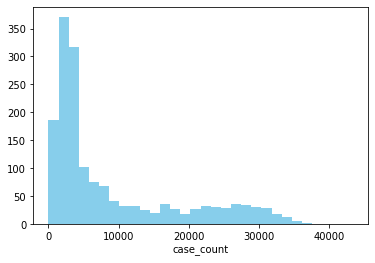

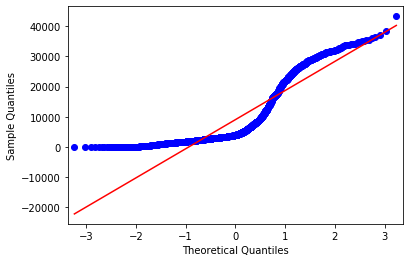

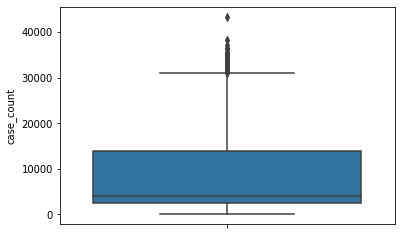

In [15]:
#sns.distplot(train_v2['case_count']);
sns.distplot(train_v2['case_count'],
                  bins=30,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1});

from statsmodels.graphics.gofplots import qqplot

# q-q plot
qqplot(train_v2['case_count'], line='s')
plt.show()

# boxplot
sns.boxplot(y = train_v2['case_count']);

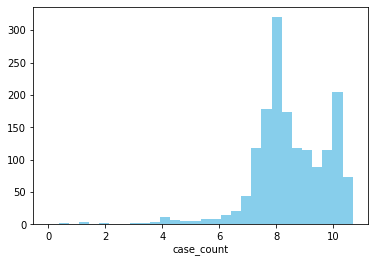

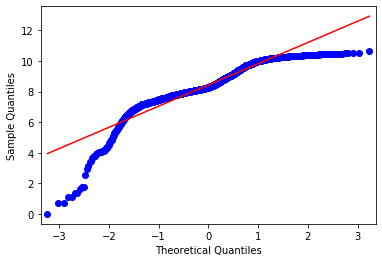

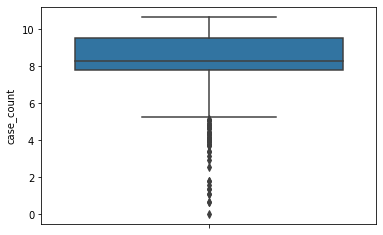

In [16]:
sns.distplot(np.log(train_v2['case_count']),
                  bins=30,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1});

from statsmodels.graphics.gofplots import qqplot

# q-q plot
qqplot(np.log(train_v2['case_count']), line='s')
plt.show()

# boxplot
sns.boxplot(y = np.log(train_v2['case_count']));

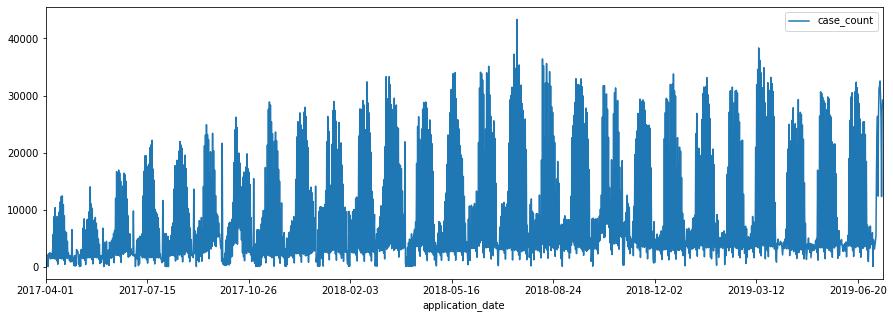

In [17]:
train_v2.drop(['segment'], axis = 1).set_index('application_date').plot(figsize = (15,5));

### **Bivariate analysis**

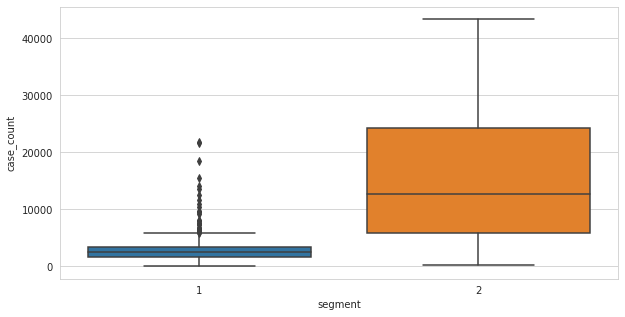

In [18]:
# Function for freq summary
cat_cols = ['segment']
def plot_box(data, cols, col_y = 'case_count'):
    for col in cols:
      fig = plt.figure(figsize=(10,5))
      sns.set_style("whitegrid")
      sns.boxplot(col, col_y, data=data)
      plt.xlabel(col) # Set text for the x axis
      plt.ylabel(col_y)# Set text for y axis
      plt.show()
        
plot_box(train_v2, cat_cols)

In [0]:
# import scipy.stats as st
# def get_best_distribution(data):
#     dist_names = ["norm", "gamma", "lognorm", "expon", "exponweib", "weibull_max", "weibull_min", 
#                   "pareto", "genextreme"]
#     dist_results = []
#     params = {}
#     for dist_name in dist_names:
#         dist = getattr(st, dist_name)
#         param = dist.fit(data)

#         params[dist_name] = param
#         # Applying the Kolmogorov-Smirnov test
#         D, p = st.kstest(data, dist_name, args=param)
#         print("p value for "+dist_name+" = "+str(p))
#         dist_results.append((dist_name, p))

#     # select the best fitted distribution
#     best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
#     # store the name of the best fit and its p value

#     print("Best fitting distribution: "+str(best_dist))
#     print("Best p value: "+ str(best_p))
#     print("Parameters for the best fit: "+ str(params[best_dist]))

#     return best_dist, best_p, params[best_dist]

# get_best_distribution(train_v2['case_count'])

In [20]:
train_v2.groupby('segment')['case_count'].describe()

,count,mean,std,min,25%,50%,75%,max
segment,,,,,,,,
1,806.00,2714.69,2042.42,1.00,1633.25,2602.00,3333.00,21885.00
2,844.00,15077.10,10188.90,206.00,5946.00,12679.00,24217.25,43340.00


## **Feature engineering**

In [0]:
def feature_eng(train_v2):
    train_v2['application_date'] = pd.to_datetime(train_v2['application_date'])

    train_v2 = pd.merge(train_v2, holidays, on = 'application_date', how = 'left')
    train_v2['HOLIDAY'] = train_v2['HOLIDAY'].fillna('Non-Holiday')
    train_v2['Holiday_flag'] = np.where(train_v2['HOLIDAY'] == 'Non-Holiday', 0, 1)

    train_v2 = pd.merge(train_v2, Diwali_HOLIDAY, on = 'application_date', how = 'left')
    train_v2['Diwali_HOLIDAY'] = train_v2['Diwali_HOLIDAY'].fillna(0)

    train_v2 = pd.merge(train_v2, Dussehra_HOLIDAY, on = 'application_date', how = 'left')
    train_v2['Dussehra_HOLIDAY'] = train_v2['Dussehra_HOLIDAY'].fillna(0)

    train_v2['year'] = train_v2['application_date'].dt.year
    train_v2['Month'] = train_v2['application_date'].dt.month
    train_v2['Date'] = train_v2['application_date'].dt.day
    train_v2['weekday'] = train_v2['application_date'].dt.weekday_name

    Seasons = {6: 'Monsoon', 7: 'Monsoon', 8: 'Monsoon', 9: 'Monsoon',
               10: 'Winter', 11: 'Winter', 12: 'Winter', 1: 'Winter',
               2: 'Summer', 3: 'Summer', 4: 'Summer', 5: 'Summer'}
  
    train_v2['Seasons'] = train_v2['Month'].map(Seasons)

    train_v2['segment'] = np.where(train_v2['segment'] == 1, 1, 0)

    Month_Index = {4: 0.5, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 1: 1, 2: 1, 3: 1.5}

    train_v2['Month_Index'] = train_v2['Month'].map(Month_Index)

    Date_index = {1 : 0.5,2 : 0.5,3 : 0.5,4 : 0.5,5 : 0.5,6 : 0.5,7 : 0.5,8 : 0.5,9 : 0.5,10 : 0.5,
                  11 : 1,12 : 1,13 : 1.5,14 : 1.5,15 : 1.5,16 : 1.5,17 : 1.5,18 : 1.5,19 : 1.5,20 : 1.5,21 : 1.5,
                  22 : 1.5,23 : 1,24 : 1,25 : 1,26 : 1,27 : 1,28 : 1,29 : 0.5,30 : 0.5,31 : 0.5}

    train_v2['Date_index'] = train_v2['Date'].map(Date_index)

    dummy_col = ['weekday', 'Seasons']
    temp = train_v2[dummy_col]
    temp = pd.get_dummies(temp)

    train_v2 = train_v2.drop(dummy_col, axis = 1)
    train_v2 = pd.concat([train_v2, temp], axis = 1)

    train_v2 = train_v2.drop(['application_date','HOLIDAY'], axis = 1)
  
    return train_v2

In [22]:
train_v2 = feature_eng(train_v2)
train_v2.head()

,segment,case_count,Holiday_flag,Diwali_HOLIDAY,Dussehra_HOLIDAY,year,Month,Date,Month_Index,Date_index,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Seasons_Monsoon,Seasons_Summer,Seasons_Winter
0,1,299.00,0,0.00,0.00,2017,4,1,0.50,0.50,0,0,1,0,0,0,0,0,1,0
1,0,897.00,0,0.00,0.00,2017,4,1,0.50,0.50,0,0,1,0,0,0,0,0,1,0
2,0,605.00,0,0.00,0.00,2017,4,2,0.50,0.50,0,0,0,1,0,0,0,0,1,0
3,1,42.00,0,0.00,0.00,2017,4,3,0.50,0.50,0,1,0,0,0,0,0,0,1,0
4,0,2016.00,0,0.00,0.00,2017,4,3,0.50,0.50,0,1,0,0,0,0,0,0,1,0


## **Machine Learning**

### **Splitting data into train and test**

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
train_size = int(len(train_v2) * 0.947)
Train, Test = train_v2[0:train_size], train_v2[train_size:len(train_v2)]
print('Observations: %d' % (len(train_v2)))
print('Training Observations: %d' % (len(Train)))
print('Testing Observations: %d' % (len(Test)))

Observations: 1650
Training Observations: 1562
Testing Observations: 88


In [24]:
print("Starting date of training data is :" , str(Train['year'][0])+"-"+str(Train['Month'][0])+"-"+str(Train['Date'][0]))
print("End date of training data is :" , str(Train['year'][1561])+"-"+str(Train['Month'][1561])+"-"+str(Train['Date'][1561]))
print(" ")
print("Starting date of test data is :" , str(Test['year'][1562])+"-"+str(Test['Month'][1562])+"-"+str(Test['Date'][1562]))
print("End date of test data is :" , str(Test['year'][1649])+"-"+str(Test['Month'][1649])+"-"+str(Test['Date'][1649]))

Starting date of training data is : 2017-4-1
End date of training data is : 2019-5-31
 
Starting date of test data is : 2019-6-1
End date of test data is : 2019-7-23


In [25]:
Test.tail()

,segment,case_count,Holiday_flag,Diwali_HOLIDAY,Dussehra_HOLIDAY,year,Month,Date,Month_Index,Date_index,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Seasons_Monsoon,Seasons_Summer,Seasons_Winter
1645,0,29778.00,0,0.00,0.00,2019,7,19,1.00,1.50,1,0,0,0,0,0,0,1,0,0
1646,0,26123.00,0,0.00,0.00,2019,7,20,1.00,1.50,0,0,1,0,0,0,0,1,0,0
1647,0,12267.00,0,0.00,0.00,2019,7,21,1.00,1.50,0,0,0,1,0,0,0,1,0,0
1648,0,27292.00,0,0.00,0.00,2019,7,22,1.00,1.50,0,1,0,0,0,0,0,1,0,0
1649,0,29183.00,0,0.00,0.00,2019,7,23,1.00,1.00,0,0,0,0,0,1,0,1,0,0


### **Creating X and y**

In [26]:
X_train = Train.drop(['case_count'], axis = 1)
y_train = np.log(Train['case_count'])
#y_train = Train['case_count']

print("Shape of features :", X_train.shape)
print("Shape of labels :", y_train.shape)

X_train.head()

Shape of features : (1562, 19)
Shape of labels : (1562,)


,segment,Holiday_flag,Diwali_HOLIDAY,Dussehra_HOLIDAY,year,Month,Date,Month_Index,Date_index,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Seasons_Monsoon,Seasons_Summer,Seasons_Winter
0,1,0,0.00,0.00,2017,4,1,0.50,0.50,0,0,1,0,0,0,0,0,1,0
1,0,0,0.00,0.00,2017,4,1,0.50,0.50,0,0,1,0,0,0,0,0,1,0
2,0,0,0.00,0.00,2017,4,2,0.50,0.50,0,0,0,1,0,0,0,0,1,0
3,1,0,0.00,0.00,2017,4,3,0.50,0.50,0,1,0,0,0,0,0,0,1,0
4,0,0,0.00,0.00,2017,4,3,0.50,0.50,0,1,0,0,0,0,0,0,1,0


In [27]:
X_test = Test.drop(['case_count'], axis = 1)
y_test = np.log(Test['case_count'])
#y_test = Test['case_count']

print("Shape of features :", X_test.shape)
print("Shape of labels :", y_test.shape)

X_test.head()

Shape of features : (88, 19)
Shape of labels : (88,)


,segment,Holiday_flag,Diwali_HOLIDAY,Dussehra_HOLIDAY,year,Month,Date,Month_Index,Date_index,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Seasons_Monsoon,Seasons_Summer,Seasons_Winter
1562,1,0,0.00,0.00,2019,6,1,1.00,0.50,0,0,1,0,0,0,0,1,0,0
1563,0,0,0.00,0.00,2019,6,1,1.00,0.50,0,0,1,0,0,0,0,1,0,0
1564,1,0,0.00,0.00,2019,6,2,1.00,0.50,0,0,0,1,0,0,0,1,0,0
1565,0,0,0.00,0.00,2019,6,2,1.00,0.50,0,0,0,1,0,0,0,1,0,0
1566,1,0,0.00,0.00,2019,6,3,1.00,0.50,0,1,0,0,0,0,0,1,0,0


### **Model evualuation**

In [0]:
import sklearn.metrics as sklm
from sklearn.svm import LinearSVR, SVR
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge,  PassiveAggressiveRegressor, Perceptron, ElasticNet, LassoLars, BayesianRidge, HuberRegressor
from sklearn.neighbors import KNeighborsRegressor, NearestCentroid
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor 
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from time import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

In [0]:
def mape(y_true, y_pred):
  mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
  return mape

In [0]:
def accuracy_summary(Regressor, X_train, y_train, X_test, y_test):
    t0 = time()
    model = Regressor.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    train_test_time = time() - t0
    #accuracy = r2_score(y_validation, y_pred)
    accuracy = mape(y_test, y_pred)
    return accuracy, train_test_time

In [0]:
seed = 123
names = ["Linear Regression", "Lasso","Ridge", "ElasticNet", "LassoLars", "BayesianRidge",
         "HuberRegressor","SGDRegressor", "Linear SVR", 
         "Support Vector Machine with RBF kernel","Passive-Aggresive","KNeighborsRegressor",
         "DecisionTreeRegressor","RandomForestRegressor","AdaBoostRegressor", 
         "GradientBoostingRegressor", "XGBRegressor-linear"]

Regressors = [
    LinearRegression(),
    Lasso(random_state=seed),
    Ridge(random_state=seed),
    ElasticNet(random_state=seed),
    LassoLars(),
    BayesianRidge(),
    HuberRegressor(),
    SGDRegressor(random_state=seed),
    LinearSVR(random_state=seed),
    SVR(),
    PassiveAggressiveRegressor(random_state=seed),
    KNeighborsRegressor(),
    DecisionTreeRegressor(random_state=seed),
    RandomForestRegressor(random_state=seed, n_estimators=500),
    AdaBoostRegressor(random_state=seed, n_estimators=500),
    GradientBoostingRegressor(loss = 'huber', random_state=seed, n_estimators=500),
    XGBRegressor(n_estimators=500, random_state=seed),
    XGBRegressor(n_estimators=500, random_state=seed, objective='count:poisson'),
    XGBRegressor(n_estimators=500, random_state=seed, objective='reg:gamma'),
    XGBRegressor(n_estimators=500, random_state=seed, objective='reg:tweedie')
    ]

zipped_reg = zip(names,Regressors)

def Regressor_comparator(Regressor=zipped_reg):
    result = []
    for n,c in Regressor:
        checker_pipeline = Pipeline([
            ('Regressor', c)
        ])
        print("Validation result for {}".format(n))
        print (c)
        reg_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,reg_accuracy,tt_time))
    return result

In [32]:
Regression_result = Regressor_comparator()
Regression_result

Validation result for Linear Regression
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Validation result for Lasso
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False)
Validation result for Ridge
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=123, solver='auto', tol=0.001)
Validation result for ElasticNet
ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=123, selection='cyclic', tol=0.0001, warm_start=False)
Validation result for LassoLars
LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, max_iter=500, normalize=True, positive=False,
          precompute='auto', verbose=False)
Validation

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Validation result for Support Vector Machine with RBF kernel
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Validation result for Passive-Aggresive
PassiveAggressiveRegressor(C=1.0, average=False, early_stopping=False,
                           epsilon=0.1, fit_intercept=True,
                           loss='epsilon_insensitive', max_iter=1000,
                           n_iter_no_change=5, random_state=123, shuffle=True,
                           tol=0.001, validation_fraction=0.1, verbose=0,
                           warm_start=False)
Validation result for KNeighborsRegressor
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
Validation result for DecisionTreeRegressor
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
           

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[('Linear Regression', 9.752376000005963, 0.0054552555084228516),
 ('Lasso', 11.055611812164662, 0.006846427917480469),
 ('Ridge', 9.724894564298996, 0.003997087478637695),
 ('ElasticNet', 11.203638775021684, 0.004336357116699219),
 ('LassoLars', 11.126797847162557, 0.0038869380950927734),
 ('BayesianRidge', 9.688027208078122, 0.005193948745727539),
 ('HuberRegressor', 7.559702814418657, 0.09488415718078613),
 ('SGDRegressor', 1.568009938710261e+16, 0.04260134696960449),
 ('Linear SVR', 13.083198825418574, 0.14217615127563477),
 ('Support Vector Machine with RBF kernel',
  10.99220781240498,
  0.23093485832214355),
 ('Passive-Aggresive', 12.403670658022493, 0.004151105880737305),
 ('KNeighborsRegressor', 8.919526894434298, 0.0060007572174072266),
 ('DecisionTreeRegressor', 7.890728879691472, 0.008643627166748047),
 ('RandomForestRegressor', 5.236120840386866, 2.5588481426239014),
 ('AdaBoostRegressor', 8.426761680626567, 0.05571126937866211),
 ('GradientBoostingRegressor', 4.9799828396

In [33]:
Regression_result_df = pd.DataFrame(Regression_result)
Regression_result_df.columns = ['Regressor', 'MAPE', 'Train and test time']
Regression_result_df = Regression_result_df.sort_values(by='MAPE', ascending=True)
Regression_result_df['MAPE'] = Regression_result_df['MAPE'].round(1).astype(str) + '%'
Regression_result_df

,Regressor,MAPE,Train and test time
15,GradientBoostingRegressor,5.0%,1.37
13,RandomForestRegressor,5.2%,2.56
16,XGBRegressor-linear,6.0%,0.69
6,HuberRegressor,7.6%,0.09
12,DecisionTreeRegressor,7.9%,0.01
14,AdaBoostRegressor,8.4%,0.06
11,KNeighborsRegressor,8.9%,0.01
5,BayesianRidge,9.7%,0.01
2,Ridge,9.7%,0.00
0,Linear Regression,9.8%,0.01


### **Tuning Gradient model**

#### **Baseline Model**

In [0]:
GB_baseline = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='huber',
                          max_depth=3, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

GB_baseline = GB_baseline.fit(X_train, y_train)
y_predict_train = GB_baseline.predict(X_train)
y_predict_test = GB_baseline.predict(X_test)

In [0]:
import math
def print_metrics(y_true, y_predicted):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    MAPE = mape(y_true, y_predicted)
    # r2_adj = r2 - (y_true.shape[0] - 1)/(y_true.shape[0] - n_parameters - 1) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('MAPE                    = ' + str(MAPE))

In [51]:
print("Training accuracy")
print_metrics(np.exp(y_train), np.exp(y_predict_train))
print(" ")
print("Test accuracy")
print_metrics(np.exp(y_test), np.exp(y_predict_test))

Training accuracy
Mean Square Error      = 4330105.208451932
Root Mean Square Error = 2080.8904844926205
Mean Absolute Error    = 1142.8351372956888
Median Absolute Error  = 483.1984061568885
R^2                    = 0.9527135882192396
MAPE                    = 113.56951328694693
 
Test accuracy
Mean Square Error      = 4949726.663387507
Root Mean Square Error = 2224.798117445155
Mean Absolute Error    = 1496.2071874744072
Median Absolute Error  = 912.5144207255817
R^2                    = 0.9581122529180325
MAPE                    = 374.07783367659164


In [52]:
# Print the name and gini importance of each feature
for feature in zip(X_train.columns.to_list(), GB_baseline.feature_importances_):
    print(feature)

('segment', 0.5644358235848957)
('Holiday_flag', 0.0013721612874243944)
('Diwali_HOLIDAY', 0.003222697146422082)
('Dussehra_HOLIDAY', 0.006308930347709596)
('year', 0.07291370879108716)
('Month', 0.019611686616212876)
('Date', 0.0907170129826674)
('Month_Index', 0.005738520614229526)
('Date_index', 0.1951516072531558)
('weekday_Friday', 0.0007357999358865732)
('weekday_Monday', 0.0016516866677345407)
('weekday_Saturday', 0.0020851353102352985)
('weekday_Sunday', 0.0302539026936612)
('weekday_Thursday', 0.0007669073182058709)
('weekday_Tuesday', 0.0003810841728584247)
('weekday_Wednesday', 0.000912712853399733)
('Seasons_Monsoon', 0.001139851295685212)
('Seasons_Summer', 0.002506184300527231)
('Seasons_Winter', 9.458682800145836e-05)


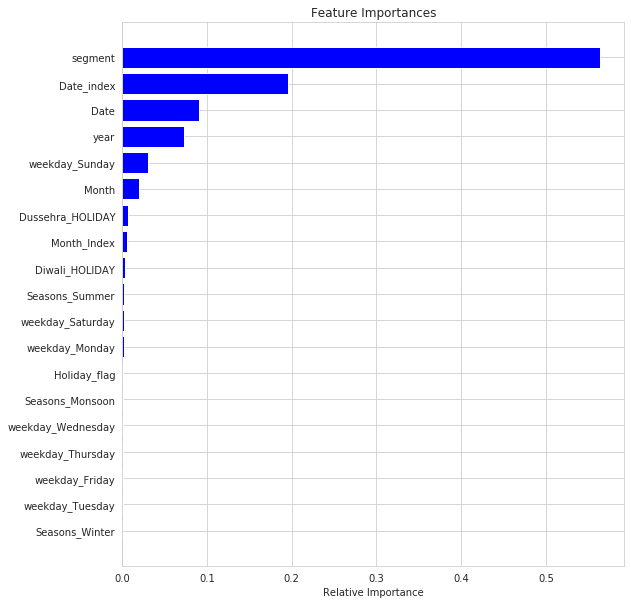

In [53]:
features = X_train.columns.to_list()
importances = GB_baseline.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (9,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show();

In [54]:
import sklearn.model_selection as ms
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import make_scorer
import numpy.random as nr
nr.seed(321)
outside = ms.TimeSeriesSplit(n_splits=10)

nr.seed(498)
#scoring = 
#custom_scorer = make_scorer(mape, greater_is_better=False)
cv_estimate = ms.cross_val_score(GB_baseline, X_train, y_train, 
                                 cv = outside) # Use the outside folds
print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.583
SDT of the metric       = 0.157
Outcomes by cv fold
Fold  1    0.584
Fold  2    0.313
Fold  3    0.423
Fold  4    0.543
Fold  5    0.509
Fold  6    0.827
Fold  7    0.788
Fold  8    0.530
Fold  9    0.773
Fold 10    0.546


#### **learning_rate**

In [0]:
import numpy.random as nr
import sklearn.model_selection as ms

nr.seed(123)
inside = ms.TimeSeriesSplit(n_splits=10)
nr.seed(321)
outside = ms.TimeSeriesSplit(n_splits=10)

In [57]:
nr.seed(3456)
## Define the dictionary for the grid search and the model object to search on
param_grid = {"learning_rate": [0.1, 0.05, 0.01, 0.005, 0.001]}

## Perform the grid search over the parameters

clf = ms.GridSearchCV(estimator = GB_baseline, param_grid = param_grid,
                      cv = inside, # Use the inside folds
                      return_train_score = True)

## Fit the cross validated grid search over the data 
clf.fit(X_train, y_train)

## And print the best parameter value
clf.best_params_, clf.best_score_

({'learning_rate': 0.01}, 0.7040183775923203)

#### **n_estimators**

In [59]:
GB_2 = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='huber',
                          max_depth=3, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

nr.seed(3456)
## Define the dictionary for the grid search and the model object to search on
param_grid = {"n_estimators": [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

## Perform the grid search over the parameters

clf = ms.GridSearchCV(estimator = GB_2, param_grid = param_grid,
                      cv = inside, # Use the inside folds
                      return_train_score = True)

## Fit the cross validated grid search over the data 
clf.fit(X_train, y_train)

## And print the best parameter value
clf.best_params_, clf.best_score_

({'n_estimators': 500}, 0.7040183775923203)

#### **max_depth**

In [60]:
nr.seed(3456)
GB_3 = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='huber',
                          max_depth=3, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

## Define the dictionary for the grid search and the model object to search on
param_grid = {'max_depth':range(2,11,2)}

## Perform the grid search over the parameters

clf = ms.GridSearchCV(estimator = GB_3, param_grid = param_grid,
                      cv = inside, # Use the inside folds
                      return_train_score = True)

## Fit the cross validated grid search over the data 
clf.fit(X_train, y_train)

## And print the best parameter value
clf.best_params_, clf.best_score_

({'max_depth': 2}, 0.6928179011725975)

#### **min_samples_split**

In [62]:
nr.seed(3456)
GB_4 = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='huber',
                          max_depth=3, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

## Define the dictionary for the grid search and the model object to search on
param_grid = {'min_samples_split':range(15,41,5)}

## Perform the grid search over the parameters

clf = ms.GridSearchCV(estimator = GB_4, param_grid = param_grid,
                      cv = inside, # Use the inside folds
                      return_train_score = True)

## Fit the cross validated grid search over the data 
clf.fit(X_train, y_train)

## And print the best parameter value
clf.best_params_, clf.best_score_

({'min_samples_split': 25}, 0.7073369527352126)

#### **min_samples_leaf**

In [64]:
nr.seed(3456)
GB_5 = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='huber',
                          max_depth=3, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=25,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

## Define the dictionary for the grid search and the model object to search on
param_grid = {'min_samples_leaf':range(1,7,1)}

## Perform the grid search over the parameters

clf = ms.GridSearchCV(estimator = GB_5, param_grid = param_grid,
                      cv = inside, # Use the inside folds
                      return_train_score = True)

## Fit the cross validated grid search over the data 
clf.fit(X_train, y_train)

## And print the best parameter value
clf.best_params_, clf.best_score_

({'min_samples_leaf': 4}, 0.7083256514775959)

#### **max_features**

In [68]:
nr.seed(3456)
GB_6 = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='huber',
                          max_depth=3, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=25,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

## Define the dictionary for the grid search and the model object to search on
param_grid = {'max_features': range(11,20,1)}

## Perform the grid search over the parameters

clf = ms.GridSearchCV(estimator = GB_6, param_grid = param_grid,
                      cv = inside, # Use the inside folds
                      return_train_score = True)

## Fit the cross validated grid search over the data 
clf.fit(X_train, y_train)

## And print the best parameter value
clf.best_params_, clf.best_score_

({'max_features': 19}, 0.7083256514775959)

#### **subsample**

In [70]:
nr.seed(3456)
GB_7 = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='huber',
                          max_depth=3, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=25,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

## Define the dictionary for the grid search and the model object to search on
param_grid = {'subsample': [0.6,0.7,0.8,0.9,1.0]}

## Perform the grid search over the parameters

clf = ms.GridSearchCV(estimator = GB_7, param_grid = param_grid,
                      cv = inside, # Use the inside folds
                      return_train_score = True)

## Fit the cross validated grid search over the data 
clf.fit(X_train, y_train)

## And print the best parameter value
clf.best_params_, clf.best_score_

({'subsample': 1.0}, 0.7083256514775959)

#### **alpha**

In [75]:
nr.seed(3456)
GB_8 = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='huber',
                          max_depth=3, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=25,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

## Define the dictionary for the grid search and the model object to search on
param_grid = {'alpha': [0.5,0.55,0.6]}

## Perform the grid search over the parameters

clf = ms.GridSearchCV(estimator = GB_8, param_grid = param_grid,
                      cv = inside, # Use the inside folds
                      return_train_score = True)

## Fit the cross validated grid search over the data 
clf.fit(X_train, y_train)

## And print the best parameter value
clf.best_params_, clf.best_score_

({'alpha': 0.55}, 0.7272263239446819)

#### **loss**

In [76]:
GB_9 = GradientBoostingRegressor(alpha=0.55, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='huber',
                          max_depth=3, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=25,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

## Define the dictionary for the grid search and the model object to search on
param_grid = {'loss': ['huber','ls', 'lad', 'quantile']}

## Perform the grid search over the parameters

clf = ms.GridSearchCV(estimator = GB_9, param_grid = param_grid,
                      cv = inside, # Use the inside folds
                      return_train_score = True)

## Fit the cross validated grid search over the data 
clf.fit(X_train, y_train)

## And print the best parameter value
clf.best_params_, clf.best_score_

({'loss': 'huber'}, 0.7272263239446819)

### **Final Model**

In [79]:
GB_Fin = GradientBoostingRegressor(alpha=0.55, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='huber',
                          max_depth=3, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=25,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

GB_Fin = GB_Fin.fit(X_train, y_train)
y_predict_train = GB_Fin.predict(X_train)
y_predict_test = GB_Fin.predict(X_test)

print("Training accuracy")
print_metrics(np.exp(y_train), np.exp(y_predict_train))
print(" ")
print("Test accuracy")
print_metrics(np.exp(y_test), np.exp(y_predict_test))

print("Cross-validation accuracy")
nr.seed(498)
#scoring = 
#custom_scorer = make_scorer(mape, greater_is_better=False)
cv_estimate = ms.cross_val_score(GB_Fin, X_train, y_train, 
                                 cv = outside) # Use the outside folds
print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Training accuracy
Mean Square Error      = 8880707.1323121
Root Mean Square Error = 2980.0515318215726
Mean Absolute Error    = 1745.9747461914992
Median Absolute Error  = 719.7319757169604
R^2                    = 0.9030192676281465
MAPE                    = 323.5218363126402
 
Test accuracy
Mean Square Error      = 6968312.657639188
Root Mean Square Error = 2639.7561738992463
Mean Absolute Error    = 1978.2084914343366
Median Absolute Error  = 1319.1138912118859
R^2                    = 0.9410296895078444
MAPE                    = 306.90406297326825
Cross-validation accuracy
Mean performance metric = 0.727
SDT of the metric       = 0.111
Outcomes by cv fold
Fold  1    0.561
Fold  2    0.737
Fold  3    0.746
Fold  4    0.568
Fold  5    0.596
Fold  6    0.848
Fold  7    0.783
Fold  8    0.712
Fold  9    0.857
Fold 10    0.863


In [109]:
print_metrics(y_test, y_predict_test)

Mean Square Error      = 0.47760942283662067
Root Mean Square Error = 0.6910929191046749
Mean Absolute Error    = 0.3143894919501784
Median Absolute Error  = 0.13577120900970208
R^2                    = 0.6582386074471618
MAPE                    = 5.4525330168122785


In [111]:
X_train = train_v2.drop(['case_count'], axis = 1)
y_train = np.log(train_v2['case_count'])
#y_train = Train['case_count']

print("Shape of features :", X_train.shape)
print("Shape of labels :", y_train.shape)

X_train.head()

Shape of features : (1650, 19)
Shape of labels : (1650,)


,segment,Holiday_flag,Diwali_HOLIDAY,Dussehra_HOLIDAY,year,Month,Date,Month_Index,Date_index,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Seasons_Monsoon,Seasons_Summer,Seasons_Winter
0,1,0,0.00,0.00,2017,4,1,0.50,0.50,0,0,1,0,0,0,0,0,1,0
1,0,0,0.00,0.00,2017,4,1,0.50,0.50,0,0,1,0,0,0,0,0,1,0
2,0,0,0.00,0.00,2017,4,2,0.50,0.50,0,0,0,1,0,0,0,0,1,0
3,1,0,0.00,0.00,2017,4,3,0.50,0.50,0,1,0,0,0,0,0,0,1,0
4,0,0,0.00,0.00,2017,4,3,0.50,0.50,0,1,0,0,0,0,0,0,1,0


In [113]:
GB_Fin = GradientBoostingRegressor(alpha=0.55, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='huber',
                          max_depth=3, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=25,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

GB_Fin = GB_Fin.fit(X_train, y_train)
y_predict_train = GB_Fin.predict(X_train)
#y_predict_test = GB_Fin.predict(X_test)

print("Training accuracy")
print_metrics(np.exp(y_train), np.exp(y_predict_train))
print(" ")
# print("Test accuracy")
# print_metrics(np.exp(y_test), np.exp(y_predict_test))

print("Cross-validation accuracy")
nr.seed(498)
#scoring = 
#custom_scorer = make_scorer(mape, greater_is_better=False)
cv_estimate = ms.cross_val_score(GB_Fin, X_train, y_train, 
                                 cv = outside) # Use the outside folds
print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Training accuracy
Mean Square Error      = 8842991.144010687
Root Mean Square Error = 2973.716722219971
Mean Absolute Error    = 1760.663314155413
Median Absolute Error  = 745.0563130566222
R^2                    = 0.9051807455028503
MAPE                    = 345.52754758793225
 
Cross-validation accuracy
Mean performance metric = 0.697
SDT of the metric       = 0.127
Outcomes by cv fold
Fold  1    0.541
Fold  2    0.746
Fold  3    0.715
Fold  4    0.529
Fold  5    0.504
Fold  6    0.830
Fold  7    0.676
Fold  8    0.833
Fold  9    0.876
Fold 10    0.724


## **Predicting test data**

In [114]:
test = pd.read_csv("./Input/test_1eLl9Yf.csv")
test_v2 = test.drop(['id'], axis = 1)
test_v2 = feature_eng(test_v2)
test_v2 = test_v2.drop_duplicates()
print("Shape of features :", test_v2.shape)

Shape of features : (180, 18)


In [115]:
feature_list = X_train.columns.tolist()
dummy_add = list(set(feature_list) - set(test_v2.columns))
print(dummy_add)

for newcol in dummy_add:
    test_v2[newcol] = 0

test_v2 = test_v2[feature_list]
test_v2.head()

['Seasons_Summer']


,segment,Holiday_flag,Diwali_HOLIDAY,Dussehra_HOLIDAY,year,Month,Date,Month_Index,Date_index,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Seasons_Monsoon,Seasons_Summer,Seasons_Winter
0,1,0,0.00,0.00,2019,7,6,1.00,0.50,0,0,1,0,0,0,0,1,0,0
1,1,0,0.00,0.00,2019,7,7,1.00,0.50,0,0,0,1,0,0,0,1,0,0
2,1,0,0.00,0.00,2019,7,8,1.00,0.50,0,1,0,0,0,0,0,1,0,0
3,1,0,0.00,0.00,2019,7,9,1.00,0.50,0,0,0,0,0,1,0,1,0,0
4,1,0,0.00,0.00,2019,7,10,1.00,0.50,0,0,0,0,0,0,1,1,0,0


In [116]:
test['case_count'] = np.exp(GB_Fin.predict(test_v2))
test['case_count'] = test['case_count'].round(0)
test.head()

,id,application_date,segment,case_count
0,1,2019-07-06,1,2694.00
1,2,2019-07-07,1,1506.00
2,3,2019-07-08,1,3452.00
3,4,2019-07-09,1,3348.00
4,5,2019-07-10,1,3348.00


In [0]:
Submission = test[['id', 'application_date', 'segment', 'case_count']]

Submission.to_csv("./Output/Submission_GB_v2.csv", index = False)